# 21BAI1133-Mukundh J
# ML Assignment 11 - PCA

Q1. Apply Principal component analysis (PCA) on the heart disease dataset.
1.Project the data onto new space using first 3 principal components.
2.Apply SVM on the projected data and compare accuracy with SVM + original data.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


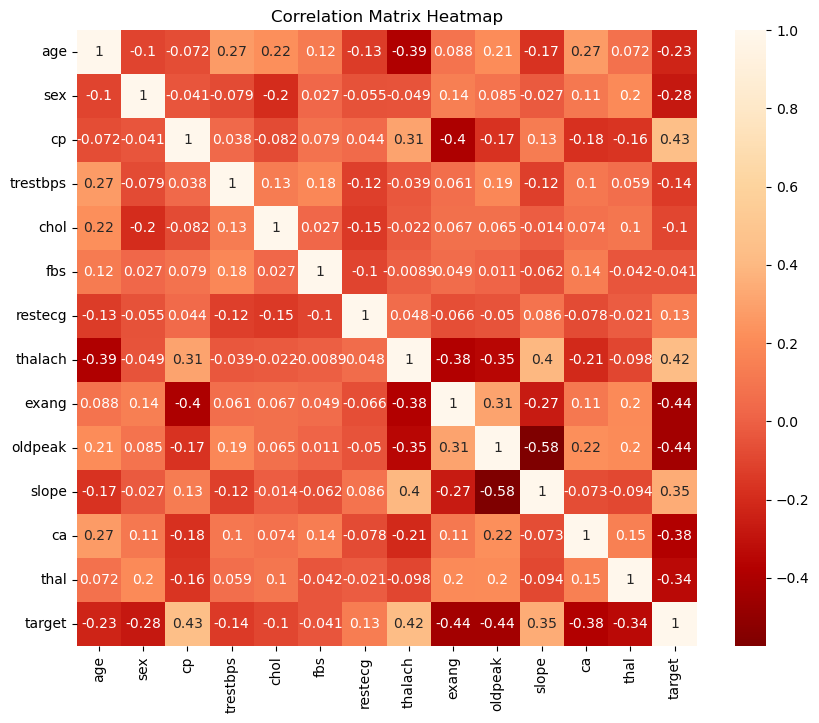

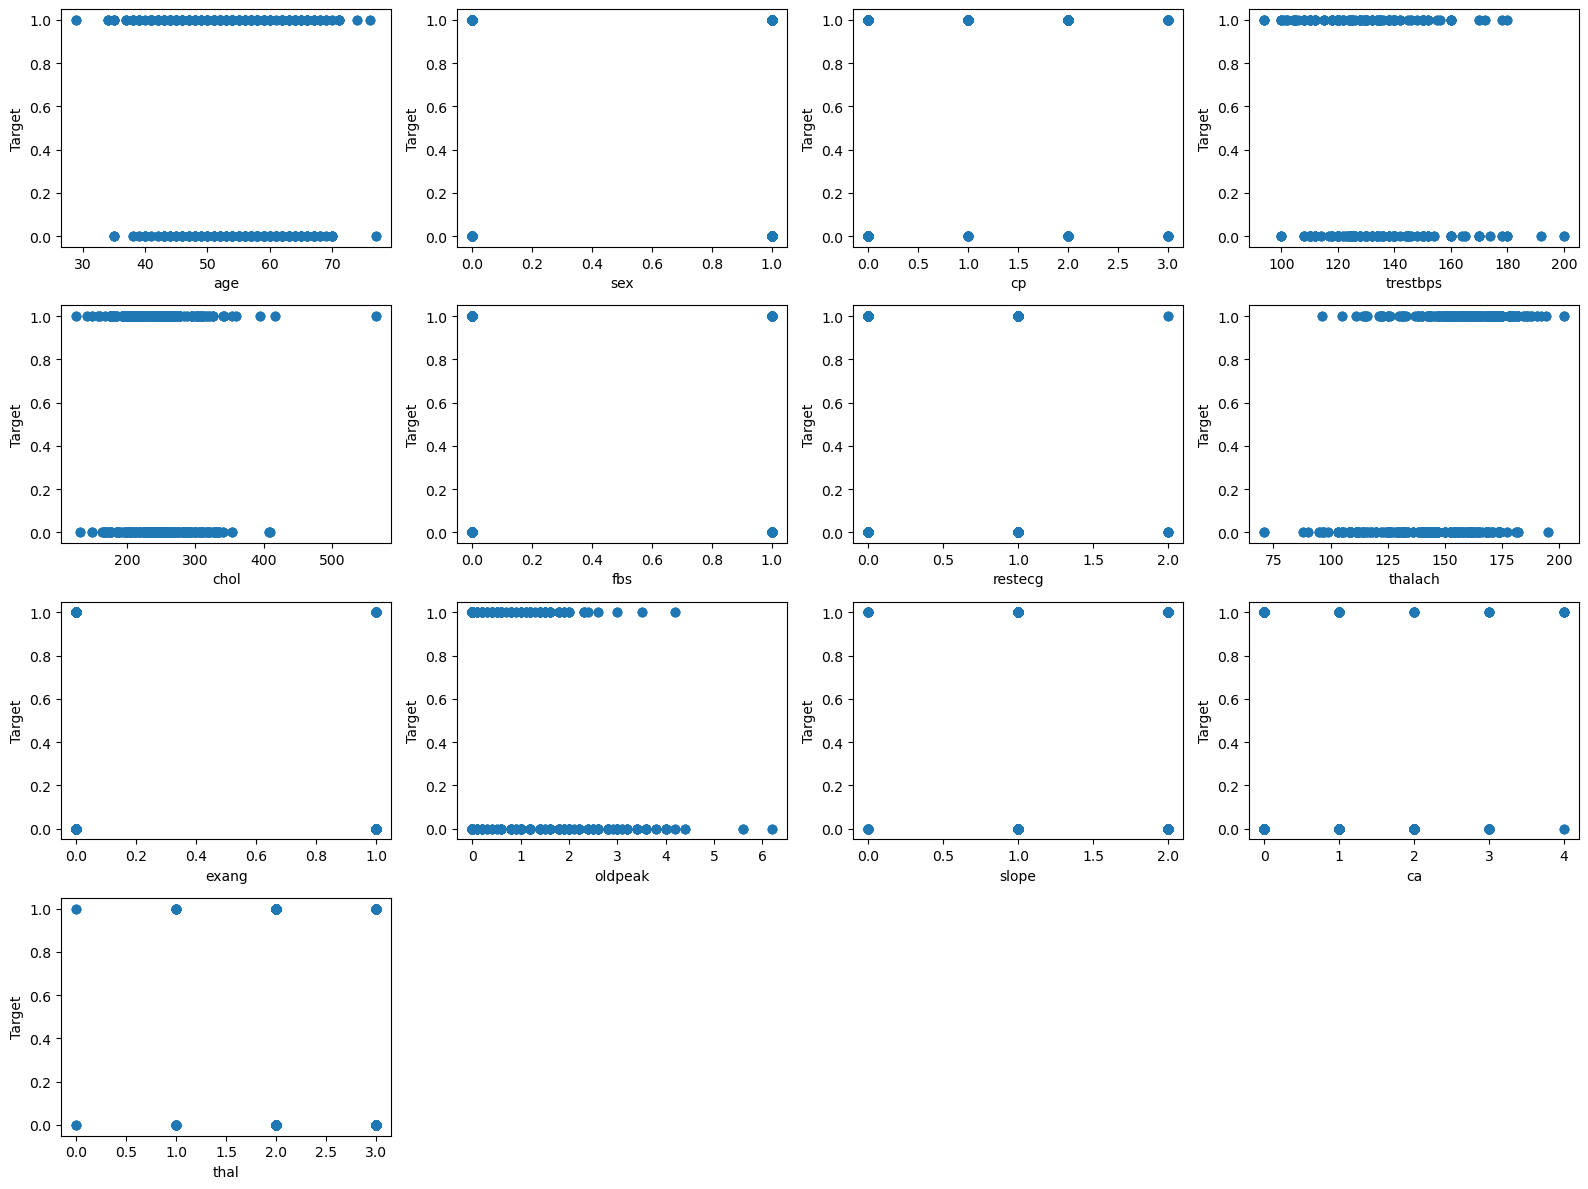

In [4]:
corr_matrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd_r')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot scatter plots
plt.figure(figsize=(16, 12))
feature_cols = df.columns[:-1]  # Exclude the target column
target_col = df.columns[-1]  # Target column
for i, feature in enumerate(feature_cols):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[feature], df[target_col])
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
svm_original = SVC()
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)


In [9]:

svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)


In [10]:
svm_original.support_vectors_

array([[ 0.28739583,  0.65465367,  1.008275  , ..., -0.64007851,
         0.24025219,  1.11057867],
       [ 0.50570484, -1.52752523, -0.91672034, ..., -0.64007851,
        -0.7254674 , -0.54519316],
       [-1.13161275,  0.65465367, -0.91672034, ...,  1.00526437,
         0.24025219, -0.54519316],
       ...,
       [-1.02245825,  0.65465367,  0.04577733, ...,  1.00526437,
        -0.7254674 , -0.54519316],
       [-1.45907627,  0.65465367,  1.008275  , ..., -0.64007851,
        -0.7254674 , -0.54519316],
       [-1.24076726,  0.65465367, -0.91672034, ...,  1.00526437,
        -0.7254674 ,  1.11057867]])

In [11]:
print("Accuracy of SVM on original data:", accuracy_original)
print("Accuracy of SVM on projected data:", accuracy_pca)


Accuracy of SVM on original data: 0.8878048780487805
Accuracy of SVM on projected data: 0.7902439024390244


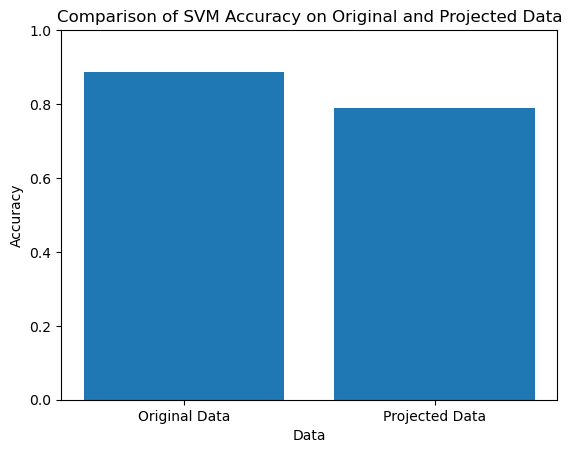

In [12]:
import matplotlib.pyplot as plt 
plt.bar(['Original Data', 'Projected Data'], [accuracy_original, accuracy_pca])
plt.ylim([0, 1])
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Accuracy on Original and Projected Data')
plt.show()

Q2. Apply PCA on shop dataset and identify 3 customer groups using hierarchical clustering. Check whether PCA improves clustering performance (use Rand index for comparison)

In [13]:
df=pd.read_csv('shop.csv')

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [16]:

columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_scale])

df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

df_scaled = pd.concat([df['CustomerID'], df['Gender'], df_scaled, df['cluster']], axis=1)


In [17]:

X = df_scaled.drop(['CustomerID', 'Gender', 'cluster'], axis=1)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X_pca)
predicted_labels = clustering.labels_

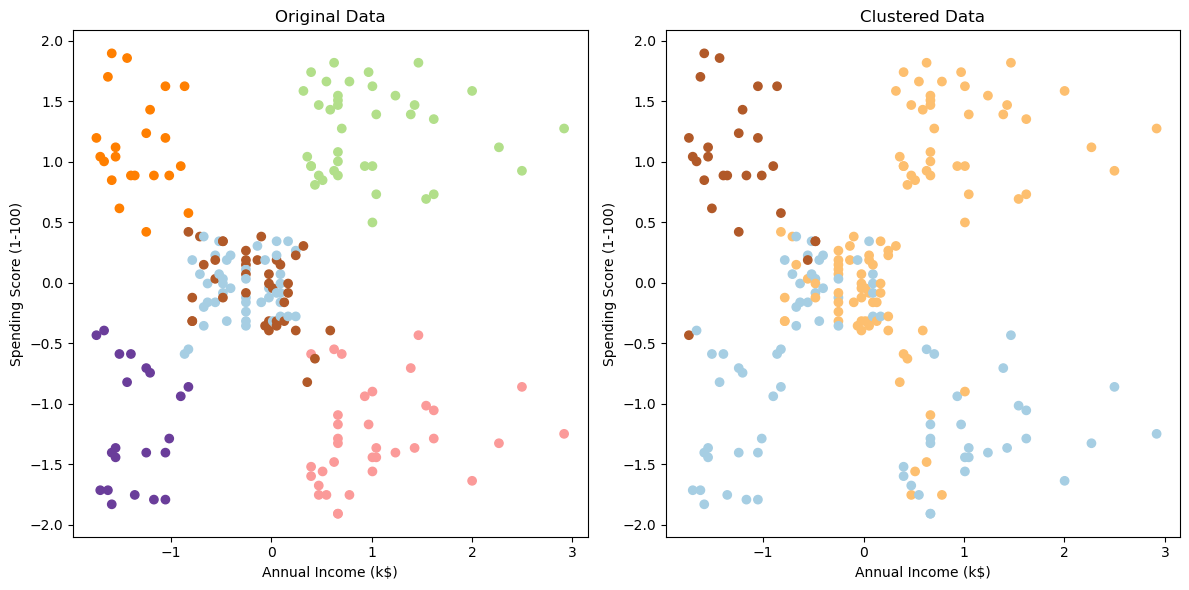

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['cluster'], cmap='Paired')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=predicted_labels, cmap='Paired')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustered Data')

plt.tight_layout()
plt.show()

In [20]:

rand_index = adjusted_rand_score(df['cluster'], predicted_labels)
print("Rand index:", rand_index)


Rand index: 0.3030904858993054


A Rand index of 0.3030904858993054 indicates a moderate level of agreement between the clusters obtained from hierarchical clustering and the original cluster labels.  It suggests that the clustering performance using hierarchical clustering on the PCA-transformed data is not very strong and that there is some similarity between the clusters obtained from hierarchical clustering and the original cluster labels, but there is also a fair amount of dissimilarity.
